In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def draw_pairs(rna, pairs):
    g = nx.Graph()
    g.add_nodes_from([i for i in range(len(rna))])
    g.add_edges_from([(s, e) for s, e in pairs])
    nx.draw(g, nx.circular_layout(g), alpha=0.7, node_color='yellow', edge_color='blue', with_labels=True, 
           labels={i: rna[i] for i in range(len(rna))})
    plt.axis('equal')
    plt.show()
    

def rna_pairs(rna, stem=3):
    n = len(rna)
    is_pair = lambda c1, c2: {'A': 'U', 'U': 'A', 'G': 'C', 'C': 'G'}[c1] == c2

    s = -np.ones((n, n))
    indexes = [[((-1, -1),) for _ in range(n)] for _ in range(n)]
    
    def compute_num_pair_bases(i, j):
        if j - i <= stem: 
            return 0
        if s[i, j] != -1: 
            return s[i, j]
        
        vertical_bases = compute_num_pair_bases(i + 1, j)
        if vertical_bases > s[i, j]:
            indexes[i][j] = ((i + 1, j),)
            s[i, j] = vertical_bases
            
        horizontal_bases = compute_num_pair_bases(i, j - 1)
        if horizontal_bases > s[i, j]:
            indexes[i][j] = ((i, j - 1),)
            s[i, j] = horizontal_bases
            
        diagonal_bases = compute_num_pair_bases(i + 1, j - 1)
        if is_pair(rna[i], rna[j]) and diagonal_bases + 1 > s[i, j]:
            indexes[i][j] = ((i + 1, j - 1),)
            s[i, j] = diagonal_bases + 1
            
        for k in (i + 1, j):
            k_base = compute_num_pair_bases(i, k) + compute_num_pair_bases(k + 1, j)
            if k_base > s[i, j]:
                indexes[i, j] = ((i, k), (k + 1, j))
                s[i, j] = k_base
        return s[i, j]
    
    
    res = set()
    def recover_answer(i, j):
        if indexes[i][j] == ((-1, -1),): 
            return res
        
        if indexes[i][j] == ((i+1, j-1),):
            res.add((i, j))
            
        for next_i, next_j in indexes[i][j]:
            res.union(recover_answer(next_i, next_j))
        return res
        
    return compute_num_pair_bases(0, n - 1), recover_answer(0, n-1)

Paired bases: 1


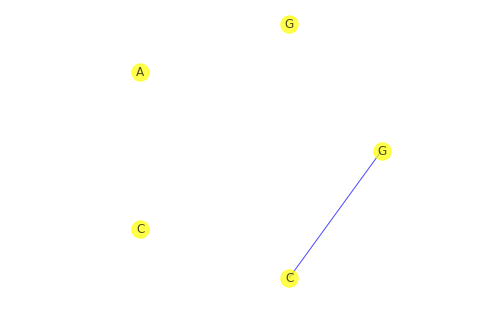

In [4]:
# TEST1

rna = 'GGACC'
n_pairs, pairs = rna_pairs(rna)

print('Paired bases: %i' % n_pairs)
draw_pairs(rna, pairs)

Paired bases: 7


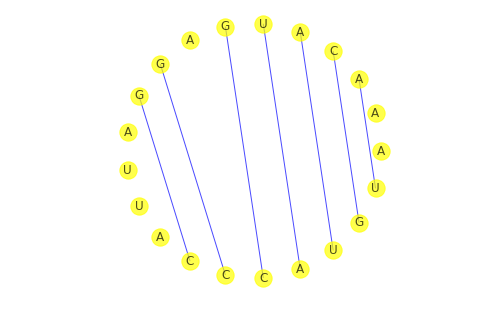

In [5]:
# TEST2

rna = 'AAACAUGAGGAUUACCCAUGU'
n_pairs, pairs = rna_pairs(rna)

print('Paired bases: %i' % n_pairs)
draw_pairs(rna, pairs)